In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
alg_df = pd.read_csv("algorithm_tool_compliance.csv")

# Notes on this dataset

#### There are a lot of qualitative/descriptive categories that I will use ML to try and find the main topics/points of
#### Need to change date_use to date/time
#### Population type is a "multi-select" category, need to split the multi-select and re-code it. Probably with Yes/No (1/0) columns
#### There is a lot of Na data in this dataset but since this is government reporting - I want to keep the Na as an indication of what is being missed with this reporting structure.

In [4]:
alg_df

,year,agency,tool_name,tool_desc_brief,tool_desc_detail,data,vendor,date_use,data_training,data_input,data_output,vendor_name,vendor_desc,identifying_info,analysis_type,population_type,updated,updated_desc
0,2022,FDNY,RBIS (Risk Based Inspection Program); ALARM (A...,ALARM is a combined approach using machine lea...,ALARM creates risk scores for each building in...,"Training data: In order to create the models, ...",ALARM was built in-house by a team of analysts...,2019/11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,FDNY,EMS Hospital Suggestion Algorithm,The algorithm computes a list of hospitals in ...,The EMS Hospital Suggestion Algorithm is used ...,Input data: The EMS Hospital Suggestion algori...,This algorithm and the resulting output file t...,2007/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,FDNY,EMS Unit Suggestion Algorithm,The algorithm computes a list of geographic at...,The EMS Unit Suggestion Algorithm is used to d...,Input data: The EMS Unit Suggestion algorithm...,This algorithm and the resulting output file t...,2007/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,FDNY,EMS Hospital Load Balancing Algorithm,The algorithm requires three data inputs: the ...,The hospital load balancing algorithm is desig...,Training data: This is an optimization model ...,The tool was developed internally at FDNY in p...,2021/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,FDNY,EMS Ambulance Scheduling Tool,The tool requires the average number of medica...,The purpose of the tool is to match the supply...,Training data: This is an optimization model a...,The tool was developed internally at FDNY in p...,2021/06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,NYPD,ShotSpotter,Provides acoustic gunshot detection to assist ...,Provides acoustic gunshot detection to assist ...,NaN,NaN,2015/03,Training data is proprietary to the vendor.,Specialized software analyzes audio signals fo...,The tool determines the location of the sound ...,Shotspotter,Software developed and maintained by vendor,False,Matching,Geographic space,Yes,Routine Maintenance
72,2023,NYPD,Patternizr,Aids crime analysis in detection of potential ...,Patternizr compares features of crimes and fin...,NaN,NaN,2016/12,Separate models were trained for each of three...,The input data is a candidate crime and its fe...,Probability that a complaint is connected to a...,NaN,The tool was developed by data scientists and ...,False,Matching,Individuals; Property; Geographic space; Other...,No,NaN
73,2023,OCME,STRMix,STRmix™ combines sophisticated biological mode...,STRMix is a probabilistic genotyping tool that...,NaN,NaN,2017/01,Training data was not used in the sense of AI ...,Forensic DNA profiles from crime scenes as wel...,The output is a deconvolution of genotype prob...,"NicheVision Forensics, LLC",The software has been developed by New Zealand...,True,Other: STRmix is a forensic DNA analysis softw...,Individuals,No,NaN
74,2023,OTI,MyCity Chatbot,The NYC MyCity chatbot is a beta AI-powered ch...,The NYC MyCity chatbot is a beta AI-powered ch...,NaN,NaN,2023/09,Training data is proprietary to the vendor.,Text queries are input by the user on the MyCi...,The tool produces text responses with referenc...,"Microsoft, Nuvalence",Microsoft provides Cloud-based ChatGPT service...,False,Speech and language processing,"Individuals; Group, organization, or business",NaN,NaN


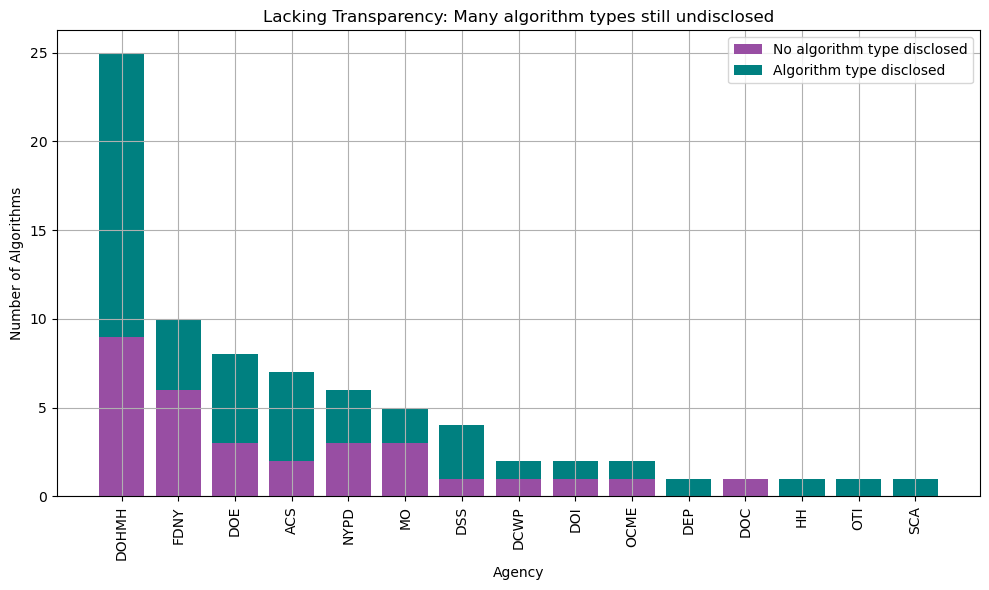

In [35]:
# Count NaN and non-NaN values in analysis_type column for each agency
nan_counts = alg_df.groupby('agency')['analysis_type'].apply(lambda x: x.isna().sum())
non_nan_counts = alg_df.groupby('agency')['analysis_type'].apply(lambda x: x.notna().sum())

# Combine NaN and non-NaN counts
total_counts = nan_counts + non_nan_counts

# Sort by total counts in ascending order
total_counts_sorted = total_counts.sort_values(ascending=False)

# Initialize figure and axes
plt.figure(figsize=(10, 6))


# Plot bar graph
plt.bar(total_counts_sorted.index, nan_counts[total_counts_sorted.index], color='#984ea3', label='NaN')
plt.bar(total_counts_sorted.index, non_nan_counts[total_counts_sorted.index], bottom=nan_counts[total_counts_sorted.index], color='#008080', label='Not NaN')

# Set labels and title
plt.xlabel('Agency')
plt.ylabel('Number of Algorithms')
plt.title('Lacking Transparency: Many algorithm types still undisclosed')
plt.xticks(rotation=90)
plt.grid()
plt.legend(labels = ["No algorithm type disclosed", "Algorithm type disclosed"])

plt.tight_layout()
plt.savefig("alg_type_transparency.png", dpi=500)

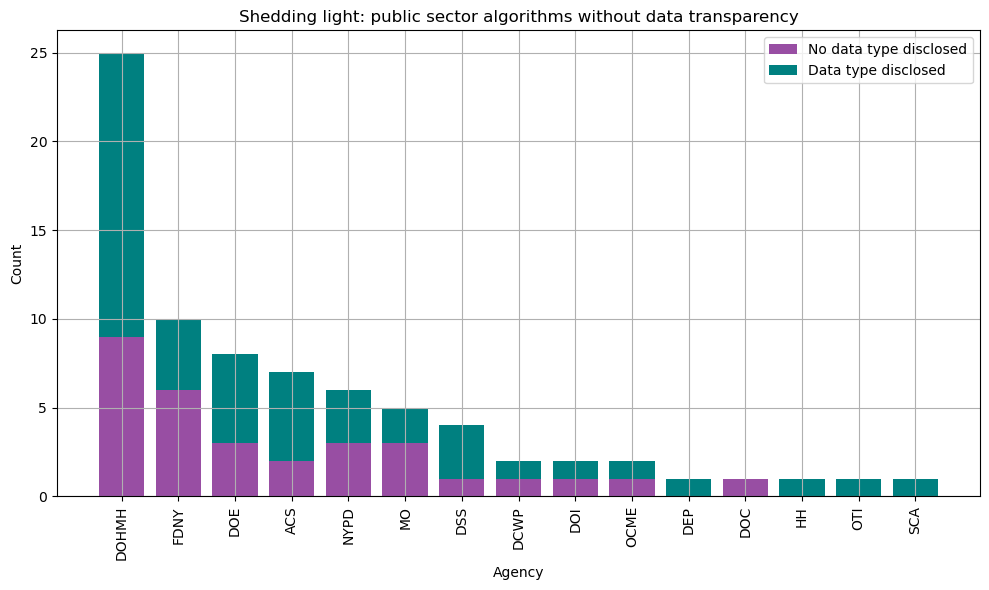

In [34]:
# Count NaN and non-NaN values in analysis_type column for each agency
nan_counts = alg_df.groupby('agency')['population_type'].apply(lambda x: x.isna().sum())
non_nan_counts = alg_df.groupby('agency')['population_type'].apply(lambda x: x.notna().sum())

# Combine NaN and non-NaN counts
total_counts = nan_counts + non_nan_counts

# Sort by total counts in ascending order
total_counts_sorted = total_counts.sort_values(ascending=False)

# Initialize figure and axes
plt.figure(figsize=(10, 6))


# Plot bar graph
plt.bar(total_counts_sorted.index, nan_counts[total_counts_sorted.index], color='#984ea3', label='NaN')
plt.bar(total_counts_sorted.index, non_nan_counts[total_counts_sorted.index], bottom=nan_counts[total_counts_sorted.index], color='#008080', label='Not NaN')

# Set labels and title
plt.xlabel('Agency')
plt.ylabel('Count')
plt.grid()
plt.title("Shedding light: public sector algorithms without data transparency")
plt.xticks(rotation=90)
plt.legend(labels = ["No data type disclosed", "Data type disclosed"])

plt.tight_layout()
plt.savefig("alg_without_dtype.png", dpi=500)

AttributeError: 'DataFrame' object has no attribute 'length'

In [36]:
alg_df["analysis_type"].isna().sum()

31

## Step 1:
Look at the unique values, types of data in the dataset, the agencies reporting algorithm use, and try and get a sense of what is contained in the descriptive categories

In [4]:
alg_df["population_type"].value_counts()

population_type
Individuals                                                             22
Individuals; Other: Sequence data can belong to any species             13
Geographic space                                                         4
Individuals; Group, organization, or business                            2
Group, organization, or business                                         1
Property; Other: civilian fatalities                                     1
Other: FDNY radio and assignment dispatcher employees                    1
Individuals; Property; Geographic space; Other: Crime Classification     1
Name: count, dtype: int64

In [5]:
#only the year is not an object.
#Changes to make: change date_use to date/time, change population type to multiple columns, expand analysis type to be mulitple columns,
    #get the "boolean" columns to be complete (if Na then Not Reported) for 'identifying_info' and 'updated'
alg_df.dtypes

year                 int64
agency              object
tool_name           object
tool_desc_brief     object
tool_desc_detail    object
data                object
vendor              object
date_use            object
data_training       object
data_input          object
data_output         object
vendor_name         object
vendor_desc         object
identifying_info    object
analysis_type       object
population_type     object
updated             object
updated_desc        object
dtype: object

In [6]:
alg_df["agency"].value_counts()

agency
DOHMH    25
FDNY     10
DOE       8
ACS       7
NYPD      6
MO        5
DSS       4
DCWP      2
DOI       2
OCME      2
DOC       1
DEP       1
HH        1
OTI       1
SCA       1
Name: count, dtype: int64

In [7]:
alg_df["analysis_type"].value_counts()

analysis_type
Predictive modeling                                                                                                                                                                                                                                                                                                                                  20
Predictive modeling; Matching                                                                                                                                                                                                                                                                                                                         8
Speech and language processing                                                                                                                                                                                                                                                                            

In [8]:
#No Na, but one problematic date: 1997/00. I am going to change that to 1997/01 and make a note of it. 
alg_df['date_use'].value_counts()

date_use
2017/10    5
2019/11    4
2007/03    4
2022/03    4
2021/06    3
2023/05    3
2017/07    3
2013/09    3
2020/05    3
2003/06    2
2022/06    2
2017/01    2
2015/03    2
2011/10    2
2020/11    2
2019/03    2
2012/06    2
2017/09    2
2016/11    2
2018/08    2
2020/07    2
2018/05    2
2021/07    2
2021/01    2
2023/08    1
2016/12    1
2019/01    1
2023/03    1
1997/00    1
2020/06    1
2023/04    1
2013/10    1
2022/08    1
2021/09    1
2016/10    1
2017/04    1
2015/09    1
2023/09    1
Name: count, dtype: int64

In [9]:
alg_df["tool_name"].value_counts()

tool_name
Facial Recognition Technology                                                                                 4
RBIS (Risk Based Inspection Program); ALARM (A Learning Approach to Risk Modeling)                            2
NYCDOE APPR Measures of Student Learning (MOSL) Growth Model                                                  2
EMS Hospital Suggestion Algorithm                                                                             2
Patternizr                                                                                                    2
ShotSpotter                                                                                                   2
Methodology for Poll Site Language Assistance - MO - CEC                                                      2
Scorecard Blockface Sampling Algorithm - MO - Operations                                                      2
Homebase Risk Assessment Questionnaire (RAQ)                                                  

In [10]:
#This column is one of the most challenging to get real insights out of but is one of the most important columns 
    #it indicates whether a tool is developed in house or with the private or third sectors
alg_df["vendor"].value_counts()

vendor
The tool was developed internally at FDNY in partnership with Columbia University's Industrial Engineering and Operations Research Department.                                                                                                                                                                                                                                                                                                                                                                                                                                                                               3
ALARM was built in-house by a team of analysts from the Management, Analysis and Planning Bureau.                                                                                                                                                                                                                                                                                                 

# Data Cleaning

In [11]:
alg_df

,year,agency,tool_name,tool_desc_brief,tool_desc_detail,data,vendor,date_use,data_training,data_input,data_output,vendor_name,vendor_desc,identifying_info,analysis_type,population_type,updated,updated_desc
0,2022,FDNY,RBIS (Risk Based Inspection Program); ALARM (A...,ALARM is a combined approach using machine lea...,ALARM creates risk scores for each building in...,"Training data: In order to create the models, ...",ALARM was built in-house by a team of analysts...,2019/11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,FDNY,EMS Hospital Suggestion Algorithm,The algorithm computes a list of hospitals in ...,The EMS Hospital Suggestion Algorithm is used ...,Input data: The EMS Hospital Suggestion algori...,This algorithm and the resulting output file t...,2007/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,FDNY,EMS Unit Suggestion Algorithm,The algorithm computes a list of geographic at...,The EMS Unit Suggestion Algorithm is used to d...,Input data: The EMS Unit Suggestion algorithm...,This algorithm and the resulting output file t...,2007/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,FDNY,EMS Hospital Load Balancing Algorithm,The algorithm requires three data inputs: the ...,The hospital load balancing algorithm is desig...,Training data: This is an optimization model ...,The tool was developed internally at FDNY in p...,2021/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,FDNY,EMS Ambulance Scheduling Tool,The tool requires the average number of medica...,The purpose of the tool is to match the supply...,Training data: This is an optimization model a...,The tool was developed internally at FDNY in p...,2021/06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,NYPD,ShotSpotter,Provides acoustic gunshot detection to assist ...,Provides acoustic gunshot detection to assist ...,NaN,NaN,2015/03,Training data is proprietary to the vendor.,Specialized software analyzes audio signals fo...,The tool determines the location of the sound ...,Shotspotter,Software developed and maintained by vendor,False,Matching,Geographic space,Yes,Routine Maintenance
72,2023,NYPD,Patternizr,Aids crime analysis in detection of potential ...,Patternizr compares features of crimes and fin...,NaN,NaN,2016/12,Separate models were trained for each of three...,The input data is a candidate crime and its fe...,Probability that a complaint is connected to a...,NaN,The tool was developed by data scientists and ...,False,Matching,Individuals; Property; Geographic space; Other...,No,NaN
73,2023,OCME,STRMix,STRmix™ combines sophisticated biological mode...,STRMix is a probabilistic genotyping tool that...,NaN,NaN,2017/01,Training data was not used in the sense of AI ...,Forensic DNA profiles from crime scenes as wel...,The output is a deconvolution of genotype prob...,"NicheVision Forensics, LLC",The software has been developed by New Zealand...,True,Other: STRmix is a forensic DNA analysis softw...,Individuals,No,NaN
74,2023,OTI,MyCity Chatbot,The NYC MyCity chatbot is a beta AI-powered ch...,The NYC MyCity chatbot is a beta AI-powered ch...,NaN,NaN,2023/09,Training data is proprietary to the vendor.,Text queries are input by the user on the MyCi...,The tool produces text responses with referenc...,"Microsoft, Nuvalence",Microsoft provides Cloud-based ChatGPT service...,False,Speech and language processing,"Individuals; Group, organization, or business",NaN,NaN


Step 1: Convert alg_df['Date_use'] to date/time.

In [12]:
#First convert the one bad date

# Function to correct invalid month '00' to '01'
def correct_month(date):
    year, month = date.split('/')
    if month == '00':
        month = '01'
    return f'{year}/{month}'

# Apply the correction function to the date column
alg_df['date_use'] = alg_df['date_use'].apply(correct_month)

In [16]:
#alg_df["date_use"] = pd.to_datetime(alg_df["date_use"], format="%Y/%m")
alg_df['date_use'] = alg_df['date_use'].dt.to_period('M')

In [17]:
alg_df["date_use"].dtype

period[M]

In [18]:
alg_df

,year,agency,tool_name,tool_desc_brief,tool_desc_detail,data,vendor,date_use,data_training,data_input,data_output,vendor_name,vendor_desc,identifying_info,analysis_type,population_type,updated,updated_desc
0,2022,FDNY,RBIS (Risk Based Inspection Program); ALARM (A...,ALARM is a combined approach using machine lea...,ALARM creates risk scores for each building in...,"Training data: In order to create the models, ...",ALARM was built in-house by a team of analysts...,2019-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,FDNY,EMS Hospital Suggestion Algorithm,The algorithm computes a list of hospitals in ...,The EMS Hospital Suggestion Algorithm is used ...,Input data: The EMS Hospital Suggestion algori...,This algorithm and the resulting output file t...,2007-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,FDNY,EMS Unit Suggestion Algorithm,The algorithm computes a list of geographic at...,The EMS Unit Suggestion Algorithm is used to d...,Input data: The EMS Unit Suggestion algorithm...,This algorithm and the resulting output file t...,2007-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,FDNY,EMS Hospital Load Balancing Algorithm,The algorithm requires three data inputs: the ...,The hospital load balancing algorithm is desig...,Training data: This is an optimization model ...,The tool was developed internally at FDNY in p...,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,FDNY,EMS Ambulance Scheduling Tool,The tool requires the average number of medica...,The purpose of the tool is to match the supply...,Training data: This is an optimization model a...,The tool was developed internally at FDNY in p...,2021-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,NYPD,ShotSpotter,Provides acoustic gunshot detection to assist ...,Provides acoustic gunshot detection to assist ...,NaN,NaN,2015-03,Training data is proprietary to the vendor.,Specialized software analyzes audio signals fo...,The tool determines the location of the sound ...,Shotspotter,Software developed and maintained by vendor,False,Matching,Geographic space,Yes,Routine Maintenance
72,2023,NYPD,Patternizr,Aids crime analysis in detection of potential ...,Patternizr compares features of crimes and fin...,NaN,NaN,2016-12,Separate models were trained for each of three...,The input data is a candidate crime and its fe...,Probability that a complaint is connected to a...,NaN,The tool was developed by data scientists and ...,False,Matching,Individuals; Property; Geographic space; Other...,No,NaN
73,2023,OCME,STRMix,STRmix™ combines sophisticated biological mode...,STRMix is a probabilistic genotyping tool that...,NaN,NaN,2017-01,Training data was not used in the sense of AI ...,Forensic DNA profiles from crime scenes as wel...,The output is a deconvolution of genotype prob...,"NicheVision Forensics, LLC",The software has been developed by New Zealand...,True,Other: STRmix is a forensic DNA analysis softw...,Individuals,No,NaN
74,2023,OTI,MyCity Chatbot,The NYC MyCity chatbot is a beta AI-powered ch...,The NYC MyCity chatbot is a beta AI-powered ch...,NaN,NaN,2023-09,Training data is proprietary to the vendor.,Text queries are input by the user on the MyCi...,The tool produces text responses with referenc...,"Microsoft, Nuvalence",Microsoft provides Cloud-based ChatGPT service...,False,Speech and language processing,"Individuals; Group, organization, or business",NaN,NaN


## Step 2:
Get rid of the NA in the boolean columns alg_df[["identifying_info", "updated"]]. If Na replace as not reported

In [19]:
alg_df["identifying_info"].isna().sum()

31

In [20]:
alg_df["identifying_info"].value_counts()

identifying_info
False    29
True     16
Name: count, dtype: int64

In [21]:
alg_df["identifying_info"] = alg_df["identifying_info"].fillna("Not Reported")

In [22]:
alg_df["identifying_info"].isna().sum()

0

In [23]:
alg_df["identifying_info"].value_counts()

identifying_info
Not Reported    31
False           29
True            16
Name: count, dtype: int64

In [24]:
alg_df["updated"].isna().sum()

33

In [25]:
alg_df["updated"].value_counts()

updated
No     27
Yes    16
Name: count, dtype: int64

In [26]:
alg_df["updated"] = alg_df["updated"].fillna("Not Reported")

In [27]:
alg_df["updated"].value_counts()

updated
Not Reported    33
No              27
Yes             16
Name: count, dtype: int64

# Step 3

The goal here is to take the "dictionary" values of alg_df["analysis_type", and "population_type"] to be in their own columns. If Na, then not reported, otherwise Yes or no

### Step 3.1

In [28]:
alg_df["analysis_type"].value_counts()

analysis_type
Predictive modeling                                                                                                                                                                                                                                                                                                                                  20
Predictive modeling; Matching                                                                                                                                                                                                                                                                                                                         8
Speech and language processing                                                                                                                                                                                                                                                                            

In [29]:
alg_df["analysis_type"].isna().sum()

31

In [30]:
def process_analysis_types(alg_df, column_name):
    # Identify unique analysis types from the existing DataFrame
    analysis_types = set(type.strip() for sublist in alg_df[column_name].dropna().unique() for type in sublist.split(';'))
    
    # Create and fill columns for each analysis type
    for analysis_type in analysis_types:
        # Initialize each new column as 'object' type to ensure compatibility with string assignments
        alg_df[analysis_type] = pd.Series(dtype='object')
        alg_df[analysis_type] = alg_df[column_name].apply(lambda x: 'yes' if pd.notna(x) and analysis_type in x else 'no')
    
    # Special handling for NA values in the original analysis type column
    alg_df.loc[alg_df[column_name].isna(), list(analysis_types)] = 'not reported'

# Assuming alg_df is already defined and loaded with your data
# Ensure the 'analysis_type' column exists and then apply the function
if 'analysis_type' in alg_df.columns:
    process_analysis_types(alg_df, 'analysis_type')
else:
    print("Error: 'analysis_type' column not found in the DataFrame.")


# Example data
data = {
    'analysis_type': [
        'Predictive modeling',
        'Predictive modeling; Matching',
        'Speech and language processing',
        'Matching',
        'Optimization',
        'Computer vision',
        'Predictive modeling; Optimization; Matching',
        'Computer vision; Optimization; Matching',
        'Computer vision; Matching',
        None  # NA value to test 'not reported'
    ]
}

In [31]:
alg_df

,year,agency,tool_name,tool_desc_brief,tool_desc_detail,data,vendor,date_use,data_training,data_input,...,analysis_type,population_type,updated,updated_desc,Matching,Speech and language processing,Computer vision,Optimization,"Other: STRmix is a forensic DNA analysis software program that uses a probabilistic genotyping algorithm to interpret complex DNA profiles, such as those from mixed samples that contain DNA from multiple contributors. Specifically, STRmix uses a continuous probabilistic modeling approach called Markov chain Monte Carlo (MCMC) analysis.",Predictive modeling
0,2022,FDNY,RBIS (Risk Based Inspection Program); ALARM (A...,ALARM is a combined approach using machine lea...,ALARM creates risk scores for each building in...,"Training data: In order to create the models, ...",ALARM was built in-house by a team of analysts...,2019-11,NaN,NaN,...,NaN,NaN,Not Reported,NaN,not reported,not reported,not reported,not reported,not reported,not reported
1,2022,FDNY,EMS Hospital Suggestion Algorithm,The algorithm computes a list of hospitals in ...,The EMS Hospital Suggestion Algorithm is used ...,Input data: The EMS Hospital Suggestion algori...,This algorithm and the resulting output file t...,2007-03,NaN,NaN,...,NaN,NaN,Not Reported,NaN,not reported,not reported,not reported,not reported,not reported,not reported
2,2022,FDNY,EMS Unit Suggestion Algorithm,The algorithm computes a list of geographic at...,The EMS Unit Suggestion Algorithm is used to d...,Input data: The EMS Unit Suggestion algorithm...,This algorithm and the resulting output file t...,2007-03,NaN,NaN,...,NaN,NaN,Not Reported,NaN,not reported,not reported,not reported,not reported,not reported,not reported
3,2022,FDNY,EMS Hospital Load Balancing Algorithm,The algorithm requires three data inputs: the ...,The hospital load balancing algorithm is desig...,Training data: This is an optimization model ...,The tool was developed internally at FDNY in p...,2021-01,NaN,NaN,...,NaN,NaN,Not Reported,NaN,not reported,not reported,not reported,not reported,not reported,not reported
4,2022,FDNY,EMS Ambulance Scheduling Tool,The tool requires the average number of medica...,The purpose of the tool is to match the supply...,Training data: This is an optimization model a...,The tool was developed internally at FDNY in p...,2021-06,NaN,NaN,...,NaN,NaN,Not Reported,NaN,not reported,not reported,not reported,not reported,not reported,not reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,NYPD,ShotSpotter,Provides acoustic gunshot detection to assist ...,Provides acoustic gunshot detection to assist ...,NaN,NaN,2015-03,Training data is proprietary to the vendor.,Specialized software analyzes audio signals fo...,...,Matching,Geographic space,Yes,Routine Maintenance,yes,no,no,no,no,no
72,2023,NYPD,Patternizr,Aids crime analysis in detection of potential ...,Patternizr compares features of crimes and fin...,NaN,NaN,2016-12,Separate models were trained for each of three...,The input data is a candidate crime and its fe...,...,Matching,Individuals; Property; Geographic space; Other...,No,NaN,yes,no,no,no,no,no
73,2023,OCME,STRMix,STRmix™ combines sophisticated biological mode...,STRMix is a probabilistic genotyping tool that...,NaN,NaN,2017-01,Training data was not used in the sense of AI ...,Forensic DNA profiles from crime scenes as wel...,...,Other: STRmix is a forensic DNA analysis softw...,Individuals,No,NaN,no,no,no,no,yes,no
74,2023,OTI,MyCity Chatbot,The NYC MyCity chatbot is a beta AI-powered ch...,The NYC MyCity chatbot is a beta AI-powered ch...,NaN,NaN,2023-09,Training data is proprietary to the vendor.,Text queries are input by the user on the MyCi...,...,Speech and language processing,"Individuals; Group, organization, or business",Not Reported,NaN,no,yes,no,no,no,no


In [32]:
alg_df.columns

Index(['year', 'agency', 'tool_name', 'tool_desc_brief', 'tool_desc_detail',
       'data', 'vendor', 'date_use', 'data_training', 'data_input',
       'data_output', 'vendor_name', 'vendor_desc', 'identifying_info',
       'analysis_type', 'population_type', 'updated', 'updated_desc',
       'Matching', 'Speech and language processing', 'Computer vision',
       'Optimization',
       'Other: STRmix is a forensic DNA analysis software program that uses a probabilistic genotyping algorithm to interpret complex DNA profiles, such as those from mixed samples that contain DNA from multiple contributors. Specifically, STRmix uses a continuous probabilistic modeling approach called Markov chain Monte Carlo (MCMC) analysis.',
       'Predictive modeling'],
      dtype='object')

In [33]:
alg_df['Predictive modeling'].value_counts()

Predictive modeling
not reported    31
yes             29
no              16
Name: count, dtype: int64

In [34]:
alg_df["Matching"].value_counts()

Matching
not reported    31
no              30
yes             15
Name: count, dtype: int64

### Step 3.2

In [35]:
alg_df['population_type'].value_counts()

population_type
Individuals                                                             22
Individuals; Other: Sequence data can belong to any species             13
Geographic space                                                         4
Individuals; Group, organization, or business                            2
Group, organization, or business                                         1
Property; Other: civilian fatalities                                     1
Other: FDNY radio and assignment dispatcher employees                    1
Individuals; Property; Geographic space; Other: Crime Classification     1
Name: count, dtype: int64

In [36]:
def process_population_types(alg_df, column_name):
    # Identify unique analysis types from the existing DataFrame
    population_types = set(type.strip() for sublist in alg_df[column_name].dropna().unique() for type in sublist.split(';'))
    
    # Create and fill columns for each analysis type
    for population_type in population_types:
        # Initialize each new column as 'object' type to ensure compatibility with string assignments
        alg_df[population_type] = pd.Series(dtype='object')
        alg_df[population_type] = alg_df[column_name].apply(lambda x: 'yes' if pd.notna(x) and analysis_type in x else 'no')
    
    # Special handling for NA values in the original analysis type column
    alg_df.loc[alg_df[column_name].isna(), list(analysis_types)] = 'not reported'

# Assuming alg_df is already defined and loaded with your data
# Ensure the 'population_type' column exists and then apply the function
if 'population_type' in alg_df.columns:
    process_analysis_types(alg_df, 'population_type')
else:
    print("Error: 'population_type' column not found in the DataFrame.")


# Sample data setup
data = {
    'population_type': [
        'Individuals',
        'Individuals; Other: Sequence data can belong to any species',
        'Geographic space',
        'Individuals; Group, organization, or business',
        'Group, organization, or business',
        'Property; Other: civilian fatalities',
        'Other: FDNY radio and assignment dispatcher employees',
        'Individuals; Property; Geographic space; Other: Crime Classification'
    ]
}

In [37]:
alg_df

,year,agency,tool_name,tool_desc_brief,tool_desc_detail,data,vendor,date_use,data_training,data_input,...,"Other: STRmix is a forensic DNA analysis software program that uses a probabilistic genotyping algorithm to interpret complex DNA profiles, such as those from mixed samples that contain DNA from multiple contributors. Specifically, STRmix uses a continuous probabilistic modeling approach called Markov chain Monte Carlo (MCMC) analysis.",Predictive modeling,Other: Crime Classification,Geographic space,Other: FDNY radio and assignment dispatcher employees,Property,Individuals,Other: civilian fatalities,"Group, organization, or business",Other: Sequence data can belong to any species
0,2022,FDNY,RBIS (Risk Based Inspection Program); ALARM (A...,ALARM is a combined approach using machine lea...,ALARM creates risk scores for each building in...,"Training data: In order to create the models, ...",ALARM was built in-house by a team of analysts...,2019-11,NaN,NaN,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
1,2022,FDNY,EMS Hospital Suggestion Algorithm,The algorithm computes a list of hospitals in ...,The EMS Hospital Suggestion Algorithm is used ...,Input data: The EMS Hospital Suggestion algori...,This algorithm and the resulting output file t...,2007-03,NaN,NaN,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
2,2022,FDNY,EMS Unit Suggestion Algorithm,The algorithm computes a list of geographic at...,The EMS Unit Suggestion Algorithm is used to d...,Input data: The EMS Unit Suggestion algorithm...,This algorithm and the resulting output file t...,2007-03,NaN,NaN,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
3,2022,FDNY,EMS Hospital Load Balancing Algorithm,The algorithm requires three data inputs: the ...,The hospital load balancing algorithm is desig...,Training data: This is an optimization model ...,The tool was developed internally at FDNY in p...,2021-01,NaN,NaN,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
4,2022,FDNY,EMS Ambulance Scheduling Tool,The tool requires the average number of medica...,The purpose of the tool is to match the supply...,Training data: This is an optimization model a...,The tool was developed internally at FDNY in p...,2021-06,NaN,NaN,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,NYPD,ShotSpotter,Provides acoustic gunshot detection to assist ...,Provides acoustic gunshot detection to assist ...,NaN,NaN,2015-03,Training data is proprietary to the vendor.,Specialized software analyzes audio signals fo...,...,no,no,no,yes,no,no,no,no,no,no
72,2023,NYPD,Patternizr,Aids crime analysis in detection of potential ...,Patternizr compares features of crimes and fin...,NaN,NaN,2016-12,Separate models were trained for each of three...,The input data is a candidate crime and its fe...,...,no,no,yes,yes,no,yes,yes,no,no,no
73,2023,OCME,STRMix,STRmix™ combines sophisticated biological mode...,STRMix is a probabilistic genotyping tool that...,NaN,NaN,2017-01,Training data was not used in the sense of AI ...,Forensic DNA profiles from crime scenes as wel...,...,yes,no,no,no,no,no,yes,no,no,no
74,2023,OTI,MyCity Chatbot,The NYC MyCity chatbot is a beta AI-powered ch...,The NYC MyCity chatbot is a beta AI-powered ch...,NaN,NaN,2023-09,Training data is proprietary to the vendor.,Text queries are input by the user on the MyCi...,...,no,no,no,no,no,no,yes,no,yes,no


In [38]:
alg_df["Individuals"].value_counts()

Individuals
yes             38
not reported    31
no               7
Name: count, dtype: int64

## Rename/delete Columns

In [39]:
alg_df.columns

Index(['year', 'agency', 'tool_name', 'tool_desc_brief', 'tool_desc_detail',
       'data', 'vendor', 'date_use', 'data_training', 'data_input',
       'data_output', 'vendor_name', 'vendor_desc', 'identifying_info',
       'analysis_type', 'population_type', 'updated', 'updated_desc',
       'Matching', 'Speech and language processing', 'Computer vision',
       'Optimization',
       'Other: STRmix is a forensic DNA analysis software program that uses a probabilistic genotyping algorithm to interpret complex DNA profiles, such as those from mixed samples that contain DNA from multiple contributors. Specifically, STRmix uses a continuous probabilistic modeling approach called Markov chain Monte Carlo (MCMC) analysis.',
       'Predictive modeling', 'Other: Crime Classification',
       'Geographic space',
       'Other: FDNY radio and assignment dispatcher employees', 'Property',
       'Individuals', 'Other: civilian fatalities',
       'Group, organization, or business',
       'Oth

In [40]:
alg_df = alg_df.rename(columns={'Other: STRmix is a forensic DNA analysis software program that uses a probabilistic genotyping algorithm to interpret complex DNA profiles, such as those from mixed samples that contain DNA from multiple contributors. Specifically, STRmix uses a continuous probabilistic modeling approach called Markov chain Monte Carlo (MCMC) analysis.': 'use_other', 'Computer vision': 'use_computer_vision', 'Predictive modeling':'use_predictive_modeling', 'Optimization': 'use_optimization','Matching':'use_matching', 'Speech and language processing': 'use_speech_language_processing', 'Property': 'use_property', 'Other: civilian fatalities': 'use_civilian_fatalities', 'Other: Crime Classification': 'use_crime_classification', 'Group, organization, or business': 'pop_group_org_business', 'Geographic space': 'pop_geographic_space', 'Other: FDNY radio and assignment dispatcher employees':'pop_FDNY_employees', 'Other: Sequence data can belong to any species': 'pop_other_species', 'Individuals': 'pop_individuals'}) 


In [41]:
alg_df.columns

Index(['year', 'agency', 'tool_name', 'tool_desc_brief', 'tool_desc_detail',
       'data', 'vendor', 'date_use', 'data_training', 'data_input',
       'data_output', 'vendor_name', 'vendor_desc', 'identifying_info',
       'analysis_type', 'population_type', 'updated', 'updated_desc',
       'use_matching', 'use_speech_language_processing', 'use_computer_vision',
       'use_optimization', 'use_other', 'use_predictive_modeling',
       'use_crime_classification', 'pop_geographic_space',
       'pop_FDNY_employees', 'use_property', 'pop_individuals',
       'use_civilian_fatalities', 'pop_group_org_business',
       'pop_other_species'],
      dtype='object')

In [42]:
alg_df = alg_df.drop(['analysis_type', 'population_type'], axis=1)

In [43]:
alg_df

,year,agency,tool_name,tool_desc_brief,tool_desc_detail,data,vendor,date_use,data_training,data_input,...,use_other,use_predictive_modeling,use_crime_classification,pop_geographic_space,pop_FDNY_employees,use_property,pop_individuals,use_civilian_fatalities,pop_group_org_business,pop_other_species
0,2022,FDNY,RBIS (Risk Based Inspection Program); ALARM (A...,ALARM is a combined approach using machine lea...,ALARM creates risk scores for each building in...,"Training data: In order to create the models, ...",ALARM was built in-house by a team of analysts...,2019-11,NaN,NaN,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
1,2022,FDNY,EMS Hospital Suggestion Algorithm,The algorithm computes a list of hospitals in ...,The EMS Hospital Suggestion Algorithm is used ...,Input data: The EMS Hospital Suggestion algori...,This algorithm and the resulting output file t...,2007-03,NaN,NaN,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
2,2022,FDNY,EMS Unit Suggestion Algorithm,The algorithm computes a list of geographic at...,The EMS Unit Suggestion Algorithm is used to d...,Input data: The EMS Unit Suggestion algorithm...,This algorithm and the resulting output file t...,2007-03,NaN,NaN,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
3,2022,FDNY,EMS Hospital Load Balancing Algorithm,The algorithm requires three data inputs: the ...,The hospital load balancing algorithm is desig...,Training data: This is an optimization model ...,The tool was developed internally at FDNY in p...,2021-01,NaN,NaN,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
4,2022,FDNY,EMS Ambulance Scheduling Tool,The tool requires the average number of medica...,The purpose of the tool is to match the supply...,Training data: This is an optimization model a...,The tool was developed internally at FDNY in p...,2021-06,NaN,NaN,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,NYPD,ShotSpotter,Provides acoustic gunshot detection to assist ...,Provides acoustic gunshot detection to assist ...,NaN,NaN,2015-03,Training data is proprietary to the vendor.,Specialized software analyzes audio signals fo...,...,no,no,no,yes,no,no,no,no,no,no
72,2023,NYPD,Patternizr,Aids crime analysis in detection of potential ...,Patternizr compares features of crimes and fin...,NaN,NaN,2016-12,Separate models were trained for each of three...,The input data is a candidate crime and its fe...,...,no,no,yes,yes,no,yes,yes,no,no,no
73,2023,OCME,STRMix,STRmix™ combines sophisticated biological mode...,STRMix is a probabilistic genotyping tool that...,NaN,NaN,2017-01,Training data was not used in the sense of AI ...,Forensic DNA profiles from crime scenes as wel...,...,yes,no,no,no,no,no,yes,no,no,no
74,2023,OTI,MyCity Chatbot,The NYC MyCity chatbot is a beta AI-powered ch...,The NYC MyCity chatbot is a beta AI-powered ch...,NaN,NaN,2023-09,Training data is proprietary to the vendor.,Text queries are input by the user on the MyCi...,...,no,no,no,no,no,no,yes,no,yes,no


In [44]:
alg_df.fillna('not reported')

,year,agency,tool_name,tool_desc_brief,tool_desc_detail,data,vendor,date_use,data_training,data_input,...,use_other,use_predictive_modeling,use_crime_classification,pop_geographic_space,pop_FDNY_employees,use_property,pop_individuals,use_civilian_fatalities,pop_group_org_business,pop_other_species
0,2022,FDNY,RBIS (Risk Based Inspection Program); ALARM (A...,ALARM is a combined approach using machine lea...,ALARM creates risk scores for each building in...,"Training data: In order to create the models, ...",ALARM was built in-house by a team of analysts...,2019-11,not reported,not reported,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
1,2022,FDNY,EMS Hospital Suggestion Algorithm,The algorithm computes a list of hospitals in ...,The EMS Hospital Suggestion Algorithm is used ...,Input data: The EMS Hospital Suggestion algori...,This algorithm and the resulting output file t...,2007-03,not reported,not reported,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
2,2022,FDNY,EMS Unit Suggestion Algorithm,The algorithm computes a list of geographic at...,The EMS Unit Suggestion Algorithm is used to d...,Input data: The EMS Unit Suggestion algorithm...,This algorithm and the resulting output file t...,2007-03,not reported,not reported,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
3,2022,FDNY,EMS Hospital Load Balancing Algorithm,The algorithm requires three data inputs: the ...,The hospital load balancing algorithm is desig...,Training data: This is an optimization model ...,The tool was developed internally at FDNY in p...,2021-01,not reported,not reported,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
4,2022,FDNY,EMS Ambulance Scheduling Tool,The tool requires the average number of medica...,The purpose of the tool is to match the supply...,Training data: This is an optimization model a...,The tool was developed internally at FDNY in p...,2021-06,not reported,not reported,...,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported,not reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023,NYPD,ShotSpotter,Provides acoustic gunshot detection to assist ...,Provides acoustic gunshot detection to assist ...,not reported,not reported,2015-03,Training data is proprietary to the vendor.,Specialized software analyzes audio signals fo...,...,no,no,no,yes,no,no,no,no,no,no
72,2023,NYPD,Patternizr,Aids crime analysis in detection of potential ...,Patternizr compares features of crimes and fin...,not reported,not reported,2016-12,Separate models were trained for each of three...,The input data is a candidate crime and its fe...,...,no,no,yes,yes,no,yes,yes,no,no,no
73,2023,OCME,STRMix,STRmix™ combines sophisticated biological mode...,STRMix is a probabilistic genotyping tool that...,not reported,not reported,2017-01,Training data was not used in the sense of AI ...,Forensic DNA profiles from crime scenes as wel...,...,yes,no,no,no,no,no,yes,no,no,no
74,2023,OTI,MyCity Chatbot,The NYC MyCity chatbot is a beta AI-powered ch...,The NYC MyCity chatbot is a beta AI-powered ch...,not reported,not reported,2023-09,Training data is proprietary to the vendor.,Text queries are input by the user on the MyCi...,...,no,no,no,no,no,no,yes,no,yes,no


In [52]:
alg_df.to_csv("alg_reporting_clean_4.csv")